In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-19.0,19000,No
1,15810944,Male,35.0,20000,No
2,15668575,NaN,NaN,2,No
3,15603246,Female,27.0,57000,No
4,15804002,Male,19.0,76000,No
...,...,...,...,...,...
395,15691863,Female,46.0,41000,Yes
396,15706071,Male,51.0,23000,Yes
397,15654296,Female,50.0,20000,Yes
398,15755018,Male,36.0,33000,No


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-19.0,19000,No
1,15810944,Male,35.0,20000,No
2,15668575,NaN,NaN,2,No
3,15603246,Female,27.0,57000,No
4,15804002,Male,19.0,76000,No


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000,Yes
396,15706071,Male,51.0,23000,Yes
397,15654296,Female,50.0,20000,Yes
398,15755018,Male,36.0,33000,No
399,15594041,Female,49.0,36000,Yes


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           393 non-null    object 
 2   Age              395 non-null    float64
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 15.8+ KB


In [7]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [8]:
df.isnull().sum().sum()

12

# Impute a categorical missing value

In [9]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer_cat.fit_transform(df[['Gender']])
df['Gender'].isnull().sum()

0

# Impute a numerical missing value

In [10]:
imputer_num = SimpleImputer(strategy='mean')
df['Age'] = imputer_num.fit_transform(df[['Age']])
df['EstimatedSalary'] = imputer_num.fit_transform(df[['EstimatedSalary']])
print(df['Age'].isnull().sum())
print(df['EstimatedSalary'].isnull().sum())
print(df['Age'])
print(df['EstimatedSalary'])

0
0
0     -19.0
1      35.0
2      37.6
3      27.0
4      19.0
       ... 
395    46.0
396    51.0
397    50.0
398    36.0
399    49.0
Name: Age, Length: 400, dtype: float64
0      19000.0
1      20000.0
2          2.0
3      57000.0
4      76000.0
        ...   
395    41000.0
396    23000.0
397    20000.0
398    33000.0
399    36000.0
Name: EstimatedSalary, Length: 400, dtype: float64


# Identify a scaling problem visually

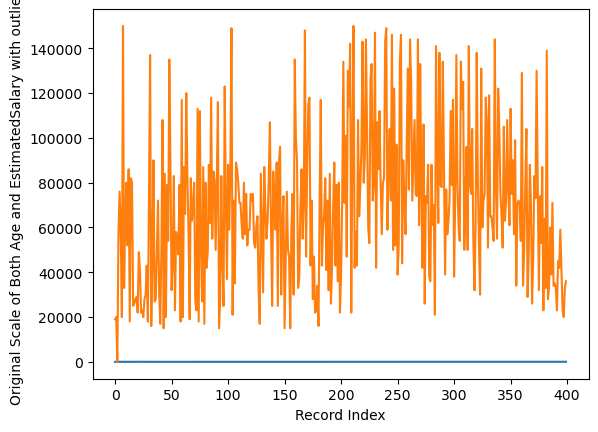

In [11]:
plt.plot(df.Age)
plt.plot(df.EstimatedSalary)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Age and EstimatedSalary with outliers')
plt.show()

#  Apply 2 methods of scaling to treat outliers

In [12]:
ss= StandardScaler()
df['Age'] = ss.fit_transform(df[['Age']])
df['EstimatedSalary'] = ss.fit_transform(df[['EstimatedSalary']])
print(df['Age'])
print(df['EstimatedSalary'])

0     -5.275409
1     -0.242333
2      0.000000
3     -0.987974
4     -1.733615
         ...   
395    0.782923
396    1.248948
397    1.155743
398   -0.149128
399    1.062538
Name: Age, Length: 400, dtype: float64
0     -1.472085
1     -1.442921
2     -2.026155
3     -0.363829
4      0.190299
         ...   
395   -0.830463
396   -1.355427
397   -1.442921
398   -1.063780
399   -0.976286
Name: EstimatedSalary, Length: 400, dtype: float64


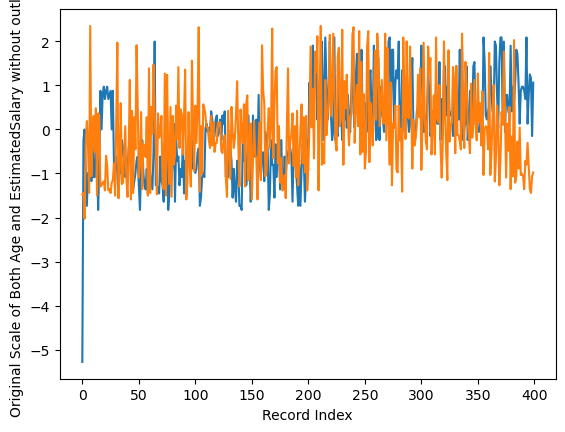

In [13]:
plt.plot(df.Age)
plt.plot(df.EstimatedSalary)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Age and EstimatedSalary without outliers')
plt.show()

In [14]:
rs = RobustScaler()
df['Age'] = rs.fit_transform(df[['Age']])
df['EstimatedSalary'] = rs.fit_transform(df[['EstimatedSalary']])
print(df['Age'])
print(df['EstimatedSalary'])

0     -3.5000
1     -0.1250
2      0.0375
3     -0.6250
4     -1.1250
        ...  
395    0.5625
396    0.8750
397    0.8125
398   -0.0625
399    0.7500
Name: Age, Length: 400, dtype: float64
0     -1.122222
1     -1.100000
2     -1.544400
3     -0.277778
4      0.144444
         ...   
395   -0.633333
396   -1.033333
397   -1.100000
398   -0.811111
399   -0.744444
Name: EstimatedSalary, Length: 400, dtype: float64


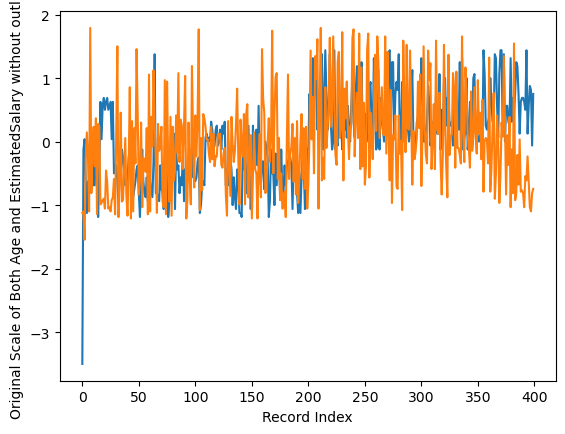

In [15]:
plt.plot(df.Age)
plt.plot(df.EstimatedSalary)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Age and EstimatedSalary without outliers')
plt.show()

# Convert a categorical variable to number

In [16]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Purchased'] = le.fit_transform(df['Purchased'])
print(df['Gender'])
print(df['Purchased'])

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int32


# Fit a classification model

# # Splitting the dataset into a Training set and a Test set

In [17]:
x=df.drop(['User ID','Gender','Purchased'],axis=1)
y=df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)
print(x)
print(y)

        Age  EstimatedSalary
0   -3.5000        -1.122222
1   -0.1250        -1.100000
2    0.0375        -1.544400
3   -0.6250        -0.277778
4   -1.1250         0.144444
..      ...              ...
395  0.5625        -0.633333
396  0.8750        -1.033333
397  0.8125        -1.100000
398 -0.0625        -0.811111
399  0.7500        -0.744444

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int32


# KNN Classifier

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred=knn_model.predict(X_test)

In [19]:
print('accuracy_score : ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score :  0.9125
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.96      0.81      0.88        32

    accuracy                           0.91        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.92      0.91      0.91        80



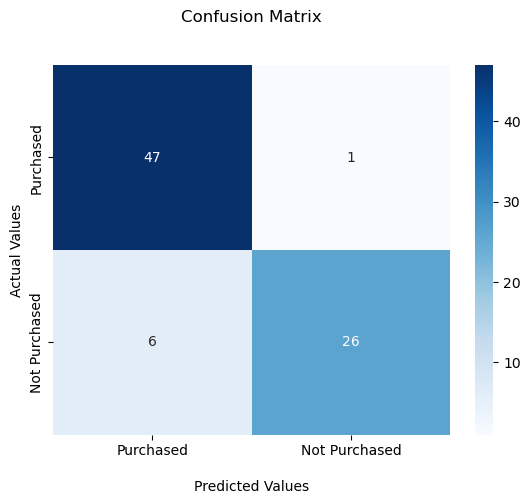

In [20]:
cm=confusion_matrix(y_test, pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix'+ '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Purchased','Not Purchased'])
ax.yaxis.set_ticklabels(['Purchased','Not Purchased'])
plt.show()

# SVM Classifier

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
pred=svm_model.predict(X_test)

In [22]:
print('accuracy_score : ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score :  0.925
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.88      0.90        32

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



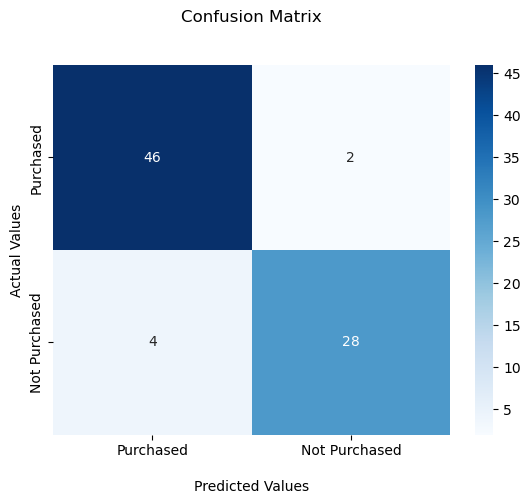

In [23]:
cm=confusion_matrix(y_test, pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix'+ '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Purchased','Not Purchased'])
ax.yaxis.set_ticklabels(['Purchased','Not Purchased'])
plt.show()

# Naive Bayes Classifier

In [24]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred=nb_model.predict(X_test)

In [25]:
print('accuracy_score : ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score :  0.825
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        48
           1       0.91      0.62      0.74        32

    accuracy                           0.82        80
   macro avg       0.85      0.79      0.80        80
weighted avg       0.84      0.82      0.82        80



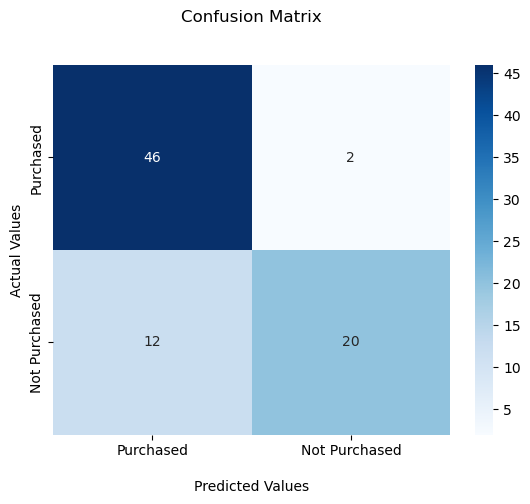

In [26]:
cm=confusion_matrix(y_test, pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix'+ '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Purchased','Not Purchased'])
ax.yaxis.set_ticklabels(['Purchased','Not Purchased'])
plt.show()